<a href="https://colab.research.google.com/github/MilanCugur/DoubledMNIST/blob/master/DoubledMNIST_Classification_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier  # Estimate the quality of custers
from sklearn.metrics import accuracy_score

# Load data

In [0]:
def extract_dataset(path):
  """
  extract DoubledMNIST dataset
  Argument: path to .zip file with the dataset
  Return value: x_train, y_train, x_test, y_test lists of numpy arrays 
  
  (DoubledMNIST dataset: train size 120k images 56x56, test size 20k images 56x56)
  """
  # import libraries
  import os                     # for basic os operations
  from zipfile import ZipFile 
  from skimage import io
  import numpy as np
  import shutil
  
  if not path.endswith('.zip'):
    raise ValueError("Error: path is not '.zip' file")
  
  archive = ZipFile(path, 'r')  # extract
  archive.extractall('./DoubledMNIST')
  archive.close()
  del archive
  
  x_train = []
  y_train = []
  x_test = []
  y_test = []
  
  for file in os.listdir('./DoubledMNIST/train'):
    img = io.imread(os.path.join('./DoubledMNIST/train', file))
    x_train.append(np.array(img))
    y_train.append(int(file.split('_')[1]))
  
  for file in os.listdir('./DoubledMNIST/test'):
    img = io.imread(os.path.join('./DoubledMNIST/test', file))
    x_test.append(np.array(img))
    y_test.append(int(file.split('_')[1]))
    
  shutil.rmtree('./DoubledMNIST')
  return x_train, y_train, x_test, y_test

In [4]:
%%time
x_train, y_train, x_test, y_test = extract_dataset('./drive/My Drive/dm_sem/DoubledMNIST.zip')

CPU times: user 1min 4s, sys: 15.8 s, total: 1min 20s
Wall time: 1min 21s


In [5]:
print(len(x_train))  # size check
print(len(y_train))
print(len(x_test))
print(len(y_test))

120000
120000
20000
20000


In [6]:
x_train[0]

array([[255, 255, 254, ..., 227, 230, 233],
       [255, 255, 254, ..., 217, 222, 225],
       [254, 254, 254, ..., 205, 211, 216],
       ...,
       [254, 254, 254, ..., 255, 254, 255],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 255, 254, 255]], dtype=uint8)

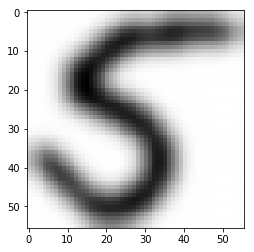

5


In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

print(y_train[0])

In [8]:
x_train[0].shape  # check image shape

(56, 56)

In [9]:
type(x_train[0])  # check image type

numpy.ndarray

# KNearest Neighbours

In [0]:
x_train_knn = np.array([img.flatten()/255.0 for img in x_train])  # image preprocessiong, convert it to [0, 1] and flatten for knn; knn dont requests normalize data?
x_test_knn = np.array([img.flatten()/255.0 for img in x_train])

In [11]:
%%time

knn = KNeighborsClassifier(n_neighbors=1, metric='l2')  # approx ~ 1nn
knn.fit(x_train_knn, y_train)  

CPU times: user 1min 9s, sys: 299 ms, total: 1min 10s
Wall time: 1min 9s


In [0]:
Nall = len(y_test)  # calculate precision
Ntrue = 0
for i in tqdm(range(len(y_test))):
  if knn.predict([x_test_knn[i]])[0]==y_test[i]:
    Ntrue += 1

In [18]:
Ntrue/Nall*100.0

9.569999999999999

In [0]:
?accuracy_score()

In [19]:
%%time
score = accuracy_score(y_test, knn.predict(x_test_knn))  # check acc score
print(score)

ValueError: ignored